# Load and Inspect Data

## 🎯 Concept Primer

Before building any model, you must **understand your data**. Wrong dtypes cause silent bugs. Missing values leak information. This notebook ensures your data is ready for cleaning.

### Data Inspection Checklist
- **Schema:** Column names, dtypes, non-null counts
- **Target distribution:** Is it balanced? How many classes?
- **Missing values:** Where are they? How many?
- **Basic stats:** min, max, mean for numeric columns

**Expected shapes:** You'll load a CSV and inspect rows × columns.

## 📋 Objectives

By the end of this notebook, you will:
1. Load the diabetes dataset from CSV
2. Display schema (.info()) and basic statistics (.describe())
3. Visualize target distribution (diabetes yes/no)
4. Check for missing values and unusual patterns
5. Document initial observations

## ✅ Acceptance Criteria

You'll know you're done when:
- [ ] DataFrame loaded successfully from CSV
- [ ] Schema printed (dtypes, non-null counts)
- [ ] Target distribution chart created
- [ ] Missing value counts documented
- [ ] Initial issues identified in reflection

## 🔧 Setup

In [1]:
# TODO 1: Import libraries
# Hint: You'll need pandas, numpy, matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline

## 📂 Load Data

### TODO 2: Read the CSV file

**Expected:** DataFrame with ~250K rows, 22 columns

**Hints:**
- Use `pd.read_csv()` with the path `../../data/diabetes_BRFSS2015.csv`
- Check the shape: `df.shape`
- Display first 5 rows: `df.head()`

In [ ]:
# TODO 2: Load CSV
df = pd.read_csv('../../../datasets/diabetes_BRFSS2015.csv')
print(f"Shape: {df.shape}")
df.head()


Shape: (253680, 22)


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes
0,Yes,Yes,Yes,40.0,Yes,No,No,No,No,Yes,...,No,5.0,18.0,15.0,Yes,Female,60-64,Grade 12 or GED (High school graduate),"Less than $20,000",No Diabetes
1,No,No,No,25.0,Yes,No,No,Yes,No,No,...,Yes,3.0,0.0,0.0,No,Female,50-54,College 4+ years (College graduate),"Less than $10,000",No Diabetes
2,Yes,Yes,Yes,28.0,No,No,No,No,Yes,No,...,Yes,5.0,30.0,30.0,Yes,Female,60-64,Grade 12 or GED (High school graduate),"$75,000 or more",No Diabetes
3,Yes,No,Yes,27.0,No,No,No,Yes,Yes,Yes,...,No,2.0,0.0,0.0,No,Female,70-74,Grades 9-11 (Some high school),"Less than $50,000",No Diabetes
4,Yes,Yes,Yes,24.0,No,No,No,Yes,Yes,Yes,...,No,2.0,3.0,0.0,No,Female,70-74,College 1-3 years (Some college/technical school),"Less than $25,000",No Diabetes


## 📊 Inspect Schema

### TODO 3: Display data types and missing counts

**Use:** `df.info()` — shows column names, dtypes, non-null counts

**Expected:** Mixed dtypes (int64, float64, object for some columns)

**Watch for:** Strings that look numeric (may need parsing)

In [7]:
# TODO 3: Check schema
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HighBP                253680 non-null  object 
 1   HighChol              253680 non-null  object 
 2   CholCheck             253680 non-null  object 
 3   BMI                   253680 non-null  float64
 4   Smoker                253680 non-null  object 
 5   Stroke                253680 non-null  object 
 6   HeartDiseaseorAttack  253680 non-null  object 
 7   PhysActivity          253680 non-null  object 
 8   Fruits                253680 non-null  object 
 9   Veggies               253680 non-null  object 
 10  HvyAlcoholConsump     253680 non-null  object 
 11  AnyHealthcare         253680 non-null  object 
 12  NoDocbcCost           253680 non-null  object 
 13  GenHlth               253680 non-null  float64
 14  MentHlth              253680 non-null  float64
 15  

## 📈 Basic Statistics

### TODO 4: Get summary statistics

**Use:** `df.describe()` — shows count, mean, std, min, max for numeric columns

**Questions to answer:**
- Are there any obviously wrong values (e.g., negative BMI)?
- What's the range of each numeric feature?

In [8]:
# TODO 4: Summary statistics
df.describe()

,BMI,GenHlth,MentHlth,PhysHlth
count,253680.000000,253680.000000,253680.000000,253680.000000
mean,28.382364,2.511392,3.184772,4.242081
std,6.608694,1.068477,7.412847,8.717951
min,12.000000,1.000000,0.000000,0.000000
25%,24.000000,2.000000,0.000000,0.000000
50%,27.000000,2.000000,0.000000,0.000000
75%,31.000000,3.000000,2.000000,3.000000
max,98.000000,5.000000,30.000000,30.000000


## 🎯 Target Distribution

### TODO 5: Visualize target variable

**Expected:** `Diabetes_binary` column with values 0 (No) and 1 (Yes)

**Questions:**
- Is the dataset balanced? (50/50 split)
- Or is it imbalanced? (e.g., 10% positive)

**Create:** Bar chart showing counts for each class

In [11]:
print(df["Diabetes"].value_counts())

Diabetes
No Diabetes    213703
Diabetes        35346
Prediabetes      4631
Name: count, dtype: int64


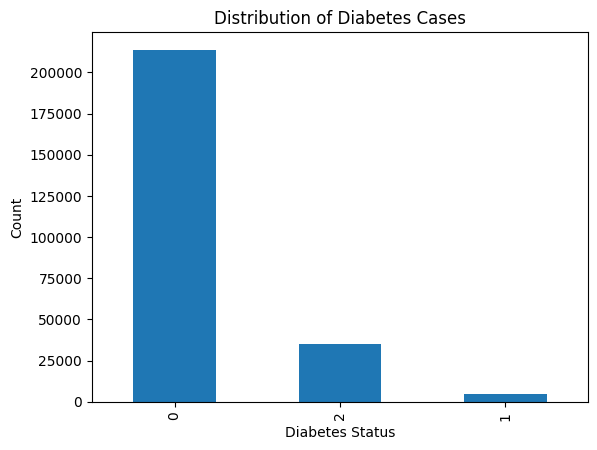

In [13]:
# TODO 5: Visualize target
# Hint: Use df['Diabetes_binary'].value_counts().plot(kind='bar')
# Label axes and add title
diabetes_map = {
    "No Diabetes": 0,
    "Prediabetes": 1,
    "Diabetes": 2
}
df['Diabetes_trinary'] = df["Diabetes"].map(diabetes_map)

df['Diabetes_trinary'].value_counts().plot(kind='bar')
plt.xlabel('Diabetes Status')
plt.ylabel('Count')
plt.title('Distribution of Diabetes Cases')
plt.show()

## 🔍 Missing Values

### TODO 6: Check for missing data

**Use:** `df.isnull().sum()` — counts missing values per column

**Questions:**
- Which columns have missing values?
- How much is missing? (< 1% vs. > 50%)

In [14]:
# TODO 6: Missing values
missing = df.isnull().sum()
print(missing[missing > 0])

Series([], dtype: int64)


## 🤔 Reflection

Answer these questions:

1. **Schema issues:** Any columns with wrong dtypes? (e.g., integers stored as strings)
2. **Missing data:** Which columns have missing values? Should we drop or impute?
3. **Class balance:** Is diabetes class balanced or imbalanced? How will this affect training?
4. **Initial concerns:** What stands out as problematic?

---
**Your reflection:**

1. **Schema issues:** Several columns have `object` dtype that should be converted to numeric or category types. Specifically:
   - Columns like `HighBP`, `HighChol`, `Smoker`, `Stroke`, etc. are object type (Yes/No) and need encoding
   - `GenHlth` is float64 but appears to be categorical based on values (1-5)
   - `Age`, `Education`, and `Income` are object types and need conversion
   - These will need to be handled in the cleaning/preprocessing step

2. **Missing data:** No missing values detected in this dataset (`df.isnull().sum()` returns empty). All columns have non-null values, which is good and simplifies our preprocessing pipeline.

3. **Class balance:** The dataset is **severely imbalanced**:
   - No Diabetes (class 0): ~213,703 cases (84%)
   - Diabetes (class 2): ~35,346 cases (14%)
   - Prediabetes (class 1): ~4,631 cases (2%)
   
   This significant imbalance will require:
   - Stratified sampling during train/test/validation splits
   - Consideration of class weights during training
   - Possibly oversampling (SMOTE) or undersampling techniques
   - Focus on metrics beyond accuracy (F1, precision, recall, ROC-AUC)
   - Note: The **trinary** nature adds complexity vs. typical binary classification

4. **Initial concerns:**
   - **Trinary target variable:** The dataset has three classes instead of the expected binary classification. Created `Diabetes_trinary` column (0=No Diabetes, 1=Prediabetes, 2=Diabetes) to encode this properly.
   - **Class imbalance:** Extreme imbalance (84% vs 14% vs 2%) will challenge model training and evaluation
   - **Object dtypes:** Many features need encoding/transformation before they can be used by ML models
   - **Feature scaling:** Numeric features like BMI, GenHlth, MentHlth, PhysHlth have different ranges and may need normalization

## 📌 Summary

✅ **Data loaded:** CSV → DataFrame  
✅ **Schema inspected:** Dtypes documented  
✅ **Target visualized:** Distribution chart created  
✅ **Missing identified:** Columns with NaN documented  
✅ **Ready for next step:** Clean the data

**Next notebook:** `03_cleaning.ipynb`